# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Montly Car Sales

Sofia Velasquez 22049

José Marchena 22398

### 0. Obtencion de datos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
car_sales = pd.read_csv(
    './data/monthly-car-sales.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)
print(car_sales.shape)

(108, 1)


C:\Users\50250\AppData\Local\Temp\ipykernel_23768\1974972431.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  car_sales = pd.read_csv(


### 1. Analisis Exploratorio

In [2]:
from scripts import analysis_graphs

value = "Sales"
title = "Montly Car Sales"

analysis_graphs(
    car_sales,
    value,
    title
)

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'analysis_graphs' from 'scripts' (c:\Users\50250\Desktop\Sofía Mishell Velásquez UVG\Cuarto Año 2025\Segundo semestre\Data Science\lab1_series_de_tiempo-1\scripts.py)

### 2. Moving Average

ACF plot


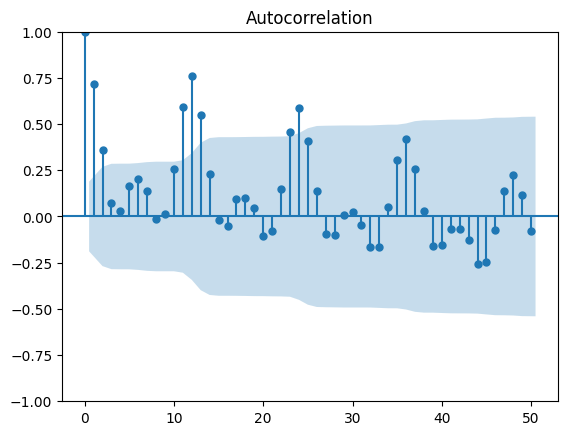

Finding Best Period
Best Lag is 11 with weight of 0.7626237302270803
Moving Average Graph


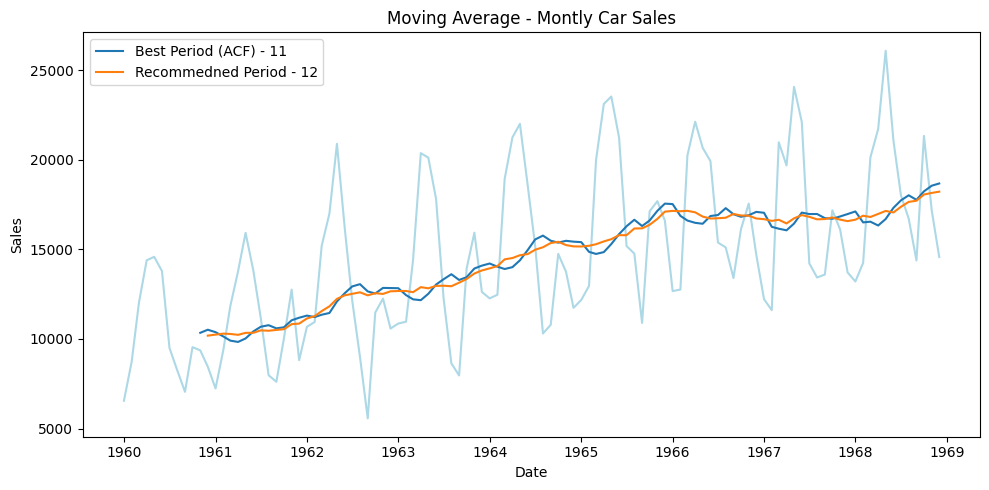

In [ ]:
from scripts import moving_average
moving_average(car_sales, value, title, 12)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


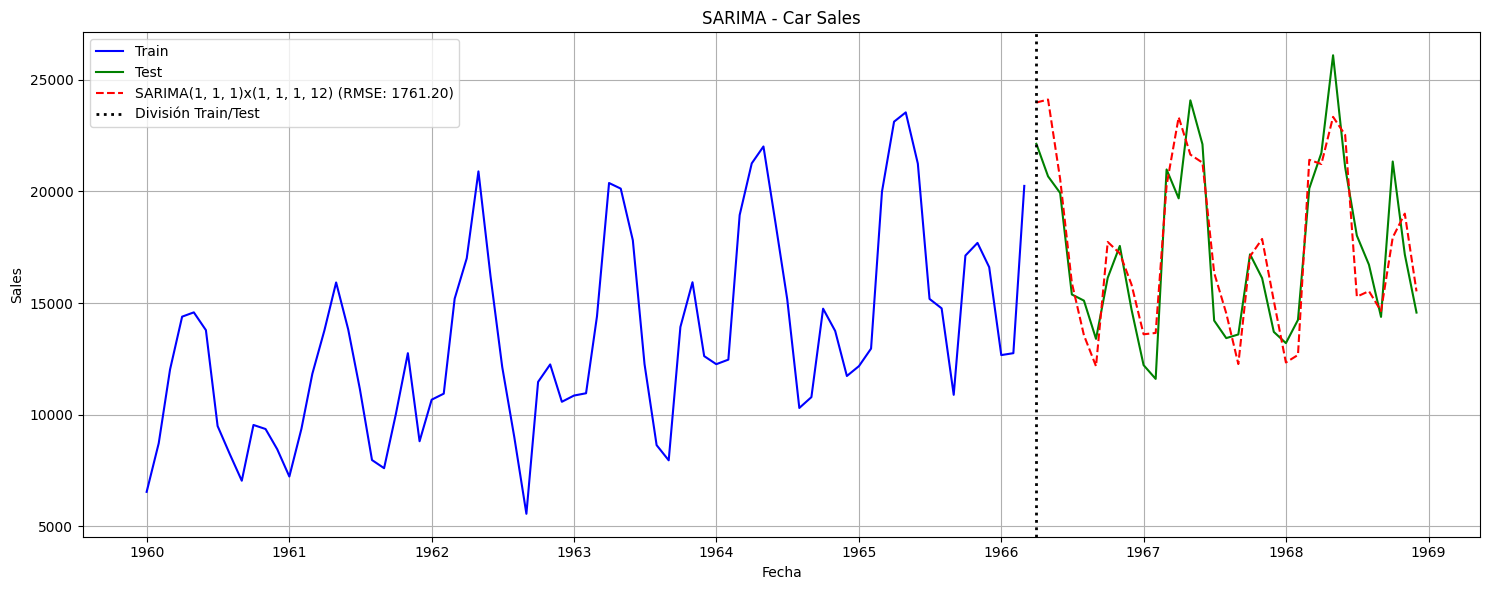

Modelo SARIMA (1, 1, 1)x(1, 1, 1, 12) ajustado.
RMSE: 1761.20, MAE: 1512.13


In [ ]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(car_sales.copy(), 'Month', 'Sales', order=(1,1,1), seasonal_order=(1,1,1,12), title="Car Sales")

*Parámetros: (1,1,1)(1,1,1,12)*

- Usé m=12 porque son ventas mensuales y tienen un ciclo anual.


### 6. Modelar serie de tiempo con Prophet

In [ ]:
# !pip install plotly
# !pip install prophet

14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing


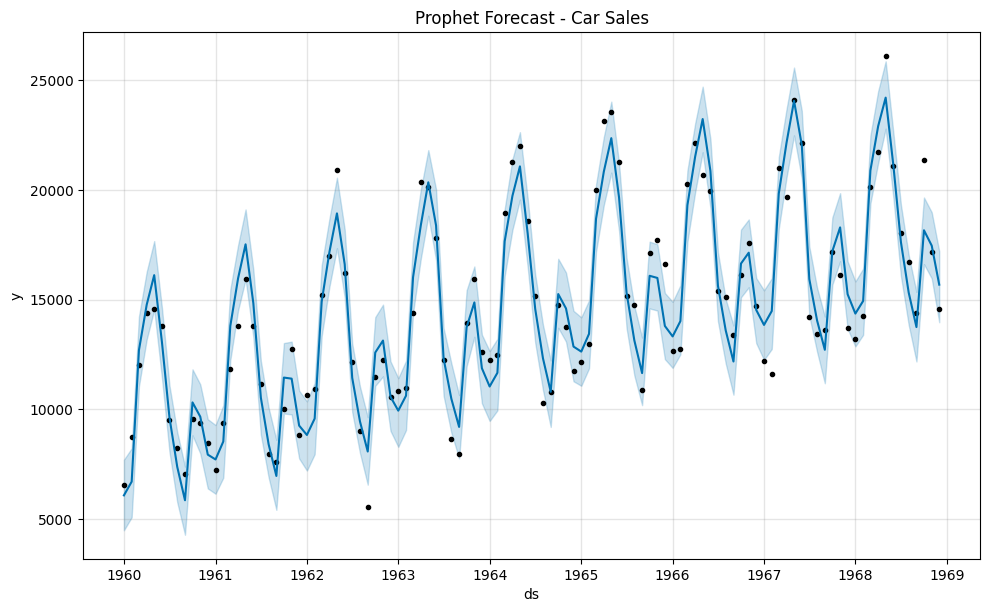

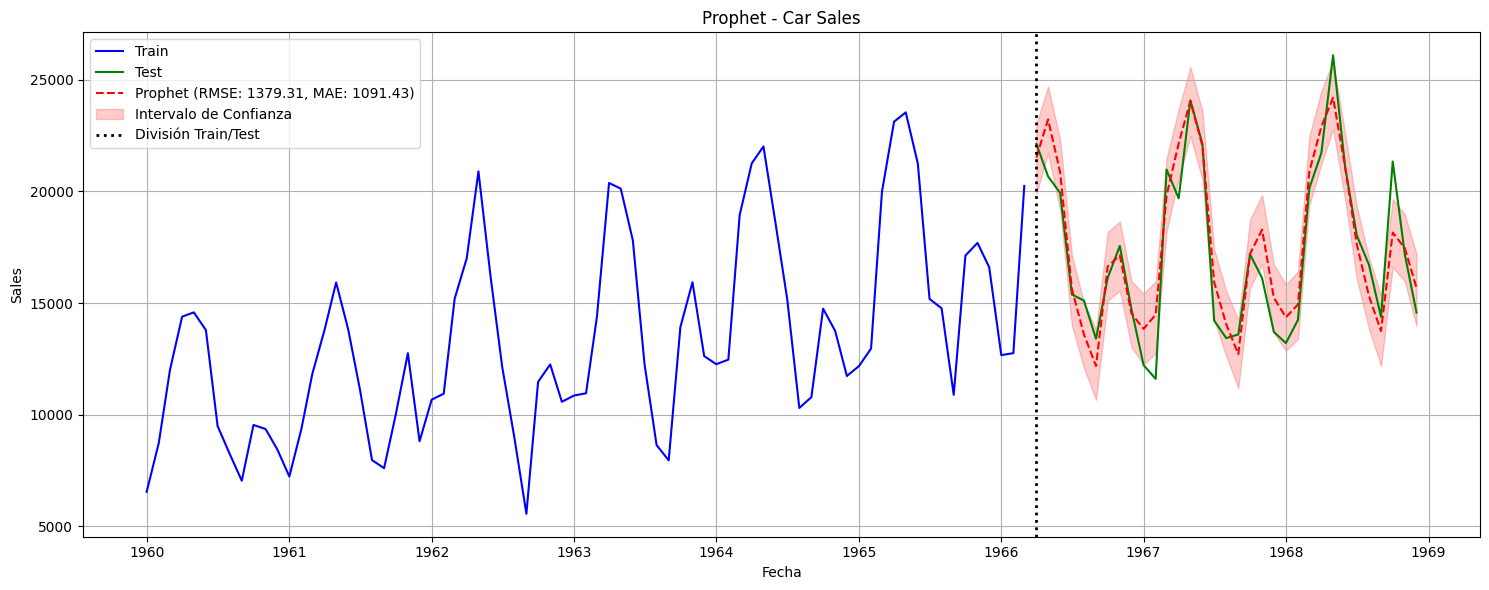

Car Sales - Prophet RMSE: 1379.31, MAE: 1091.43


In [ ]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(car_sales.copy(), 'Month', 'Sales', title="Car Sales")

### Comparación de modelos

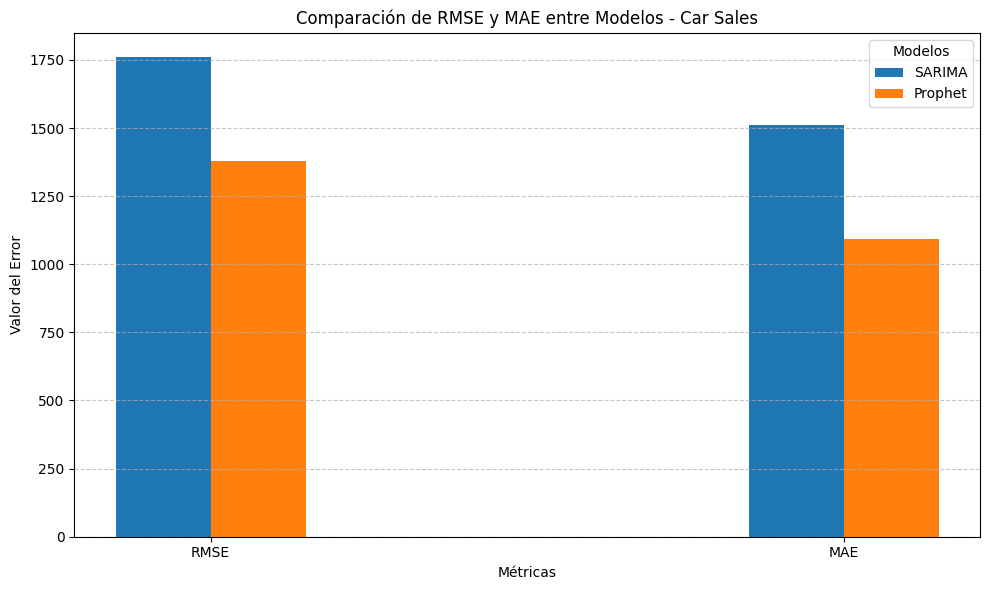

In [3]:
from scripts import plot_model_comparison
model_metrics = {
    "SARIMA": {"RMSE": 1761.20, "MAE": 1512.13},
    "Prophet": {"RMSE": 1379.31, "MAE": 1091.43}
    }

plot_model_comparison(model_metrics, title="Comparación de RMSE y MAE entre Modelos - Car Sales")
